Using TensorFlow backend.


XTrain class =  <class 'numpy.ndarray'>
YTrain class =  <class 'numpy.ndarray'>
XTest shape =  <class 'numpy.ndarray'>
YTest shape =  <class 'numpy.ndarray'>
XTrain shape =  (7859,)
XTest shape =  (3369,)
YTrain shape =  (7859,)
YTest shape =  (3369,)
YTrain values =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
YTest values =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
YTrain distribution =  {0: 50, 1: 378, 2: 66, 3: 2769, 4: 1701, 5: 14, 6: 39, 7: 15, 8: 126, 9: 93, 10: 114, 11: 337, 12: 40, 13: 149, 14: 18, 15: 19, 16: 387, 17: 33, 18: 59, 19: 475, 20: 238, 21: 91, 22: 10, 23: 36, 24: 56, 25: 77, 26: 18, 27: 13, 28: 43, 29: 19, 30: 38, 31: 34, 32: 30, 33: 9, 34: 43, 35: 10, 36: 46, 37: 17, 38: 16, 39: 20, 40: 32, 41: 28, 42: 10, 43: 19, 44: 10, 45: 14}
YTrain distribution =  {0: 17, 1: 159, 2

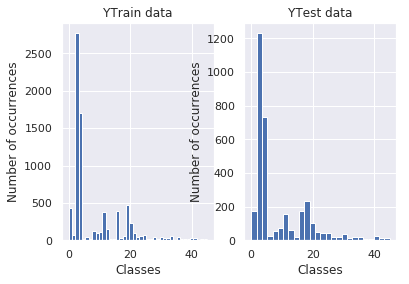

[1, 3267, 699, 3434, 2295, 56, 16784, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 19261, 49, 2295, 13415, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 13415, 30625, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]
557056/550378 [==============================] - 1s 2us/step
30979
the termination payment airport takes 6 visibility geological 3 6 602 begin up said fully bank expects commodity total is giant a recreation this takes leroy series termination payment airport mln a for capital 1 pre 50 american east said in council takes leroy recommend's france a but u any 4 s 1st losses pct dlrs
4
[0. 1. 0. ... 0. 0. 0.]
10000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               5120512   
_________________________________________________________________
activation_1 (Activation)    (None, 512)       

In [1]:
from keras.datasets import reuters

(XTrain, YTrain),(XTest, YTest) = reuters.load_data(num_words=None, test_split=0.3)

print('XTrain class = ',type(XTrain))
print('YTrain class = ',type(YTrain))
print('XTest shape = ',type(XTest))
print('YTest shape = ',type(YTest))

print('XTrain shape = ',XTrain.shape)
print('XTest shape = ',XTest.shape)
print('YTrain shape = ',YTrain.shape)
print('YTest shape = ',YTest.shape)

import numpy as np
print('YTrain values = ',np.unique(YTrain))
print('YTest values = ',np.unique(YTest))

unique, counts = np.unique(YTrain, return_counts=True)
print('YTrain distribution = ',dict(zip(unique, counts)))
unique, counts = np.unique(YTest, return_counts=True)
print('YTrain distribution = ',dict(zip(unique, counts)))

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(1)
plt.subplot(121)
plt.hist(YTrain, bins='auto')
plt.xlabel("Classes")
plt.ylabel("Number of occurrences")
plt.title("YTrain data")

plt.subplot(122)
plt.hist(YTest, bins='auto')
plt.xlabel("Classes")
plt.ylabel("Number of occurrences")
plt.title("YTest data")
plt.show()

print(XTrain[1])
len(XTrain[1])

#The dataset_reuters_word_index() function returns a list where the names are words and the values are integer
WordIndex = reuters.get_word_index(path="reuters_word_index.json")

print(len(WordIndex))

IndexToWord = {}
for key, value in WordIndex.items():
    IndexToWord[value] = key

print(' '.join([IndexToWord[x] for x in XTrain[1]]))
print(YTrain[1])

from keras.preprocessing.text import Tokenizer

MaxWords = 10000

Tok = Tokenizer(num_words=MaxWords)
XTrain = Tok.sequences_to_matrix(XTrain, mode='binary')
XTest = Tok.sequences_to_matrix(XTest, mode='binary')



NumClasses = max(YTrain) + 1

from keras.utils import to_categorical
YTrain = to_categorical(YTrain, NumClasses)
YTest = to_categorical(YTest, NumClasses)

print(XTrain[1])
print(len(XTrain[1]))


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation

DNNmodel = Sequential()
DNNmodel.add(Dense(512, input_shape=(MaxWords,)))
DNNmodel.add(Activation('relu'))
DNNmodel.add(Dropout(0.5))
DNNmodel.add(Dense(NumClasses))
DNNmodel.add(Activation('softmax'))
DNNmodel.summary()

DNNmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


DNNmodel.fit(XTrain, YTrain, validation_data=(XTest, YTest), epochs=10, batch_size=64, verbose=1)

Scores = DNNmodel.evaluate(XTest, YTest, verbose=1)
print('Test loss:', Scores[0])
print('Test accuracy:', Scores[1])

